# CSSM 550 - HW 3
The purpose of this homework is to review and practice fundamental machine learning concepts.<BR>
I will present the applications of different classifiers used for binary classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Read the Data set

cses4 = pd.read_csv('cses4_cut.csv')
X = cses4.iloc[:,:-1]
y = cses4.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=97)

cses4

,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,2,2,9,9,9,1,422,...,9,9,8300,121,8,999,999,4,31,True
1,2,3,1,2,2,9,9,9,8,999,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,1,2,2,9,9,9,7,818,...,5,9,1101,121,2,999,999,4,67,True
4,2,4,4,2,2,9,9,9,5,513,...,9,9,8300,121,2,999,999,4,26,False
5,1,6,4,1,1,9,9,9,1,235,...,1,9,1101,121,2,999,999,4,55,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74253,2,4,1,2,2,9,9,9,1,999,...,1,9,1211,999,55,1,999,9,62,True
74254,1,3,1,2,2,9,9,9,9,999,...,1,9,8300,999,17,1,999,9,65,True
74255,2,6,2,2,2,9,9,9,1,999,...,4,9,1211,999,19,1,999,9,61,True
74256,2,7,1,2,1,9,9,9,1,999,...,6,9,1210,999,25,1,999,9,53,True


## Classifiers without reduction

In [3]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#### Logistic Regression
LR = LogisticRegression()
LR_accuracy=cross_val_score(LR, X, y, cv=cv).mean()

#### Decision Tree
decision_tree = DecisionTreeClassifier()
DT_accuracy=cross_val_score(decision_tree, X, y, cv=cv).mean()

#### Support Vector Machine
SVM = SVC(probability = True)
SVM_accuracy=cross_val_score(SVM, X, y, cv=cv).mean()

#### Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA_accuracy=cross_val_score(LDA, X, y, cv=cv).mean()

#### Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
QDA_accuracy=cross_val_score(QDA, X, y, cv=cv).mean()

#### Random Forest Classifier
random_forest = RandomForestClassifier()
RF_accuracy=cross_val_score(random_forest, X, y, cv=cv).mean()

#### K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_accuracy=cross_val_score(KNN, X, y, cv=cv).mean()

#### Naive Bayes
bayes = GaussianNB()
BAYES_accuracy=cross_val_score(bayes, X, y, cv=cv).mean()

pd.options.display.float_format = '{:,.2f}%'.format
accuracies1 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy'    : [100*LR_accuracy, 100*DT_accuracy, 100*SVM_accuracy, 100*LDA_accuracy, 100*QDA_accuracy, 100*RF_accuracy, 100*KNN_accuracy, 100*BAYES_accuracy],
    }, columns = ['Model', 'Accuracy'])

accuracies1.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,86.78%
6,K-Nearest Neighbors,84.47%
3,Linear Discriminant Analysis,83.75%
0,Logistic Regression,83.26%
2,Support Vector Machine,82.47%
1,Decision Tree,78.12%
4,Quadratic Discriminant Analysis,69.86%
7,Bayes,69.34%


## Feature selection and Dimensionality-reduction

In [4]:
#Select features according to the k highest scores

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
kscores = fit.scores_
X_new = test.fit_transform(X, y)

# Features in descending order by score
dicts = {}
dicts=dict(zip(cses4.columns, kscores))
sort_dicts = sorted(dicts.items(), key=lambda x: x[1], reverse=True)

# I'll take 12 features with the highest score
sort_dicts[:12]

[('D2026', 137612.5250347248),
 ('D2027', 48651.854803746086),
 ('D2029', 41862.441438072274),
 ('D2021', 23616.010551455885),
 ('D2011', 18013.967469289142),
 ('D2030', 11274.361206204272),
 ('D2022', 9679.99694947531),
 ('D2028', 8300.820953075867),
 ('D2023', 7728.432886280269),
 ('D2015', 6210.004841830223),
 ('age', 4588.480589050823),
 ('D2016', 3974.291250009994)]

In [5]:
# I took 12 features with the highest score
X_new=cses4[['D2011','D2015','D2016','D2021','D2022','D2023','D2026','D2027','D2028','D2029','D2030','age']]

# new table after dimensionality-reduction
X_new

,D2011,D2015,D2016,D2021,D2022,D2023,D2026,D2027,D2028,D2029,D2030,age
0,422,99,999,3,0,99,8300,121,8,999,999,31
1,999,1,931,5,3,99,1101,121,12,999,999,42
2,818,8,999,3,0,99,1101,121,2,999,999,67
4,513,99,999,7,2,99,8300,121,2,999,999,26
5,235,99,999,2,0,99,1101,121,2,999,999,55
...,...,...,...,...,...,...,...,...,...,...,...,...
74253,999,12,999,99,0,99,1211,999,55,1,999,62
74254,999,12,999,99,0,99,8300,999,17,1,999,65
74255,999,99,999,99,2,99,1211,999,19,1,999,61
74256,999,12,999,99,2,99,1210,999,25,1,999,53


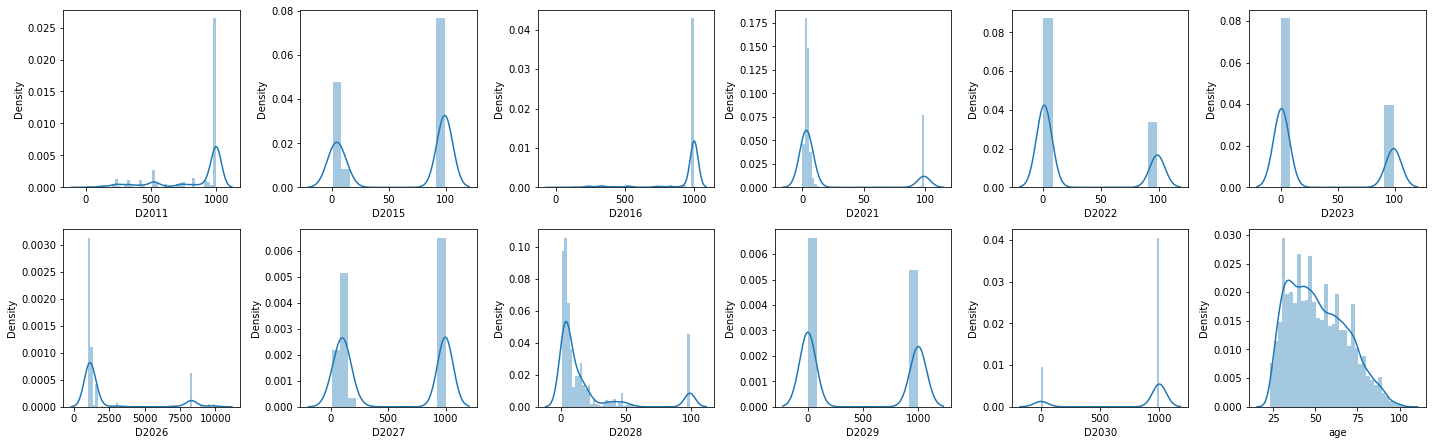

In [6]:
# data distribution of new table

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in X_new:
    if plotnumber <= 12:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(X_new[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer

# since the data distribution of new table is not Gaussian I will make pre-processing and transform it in Gaussian form
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_new_trans = quantile_transformer.fit_transform(X_new)

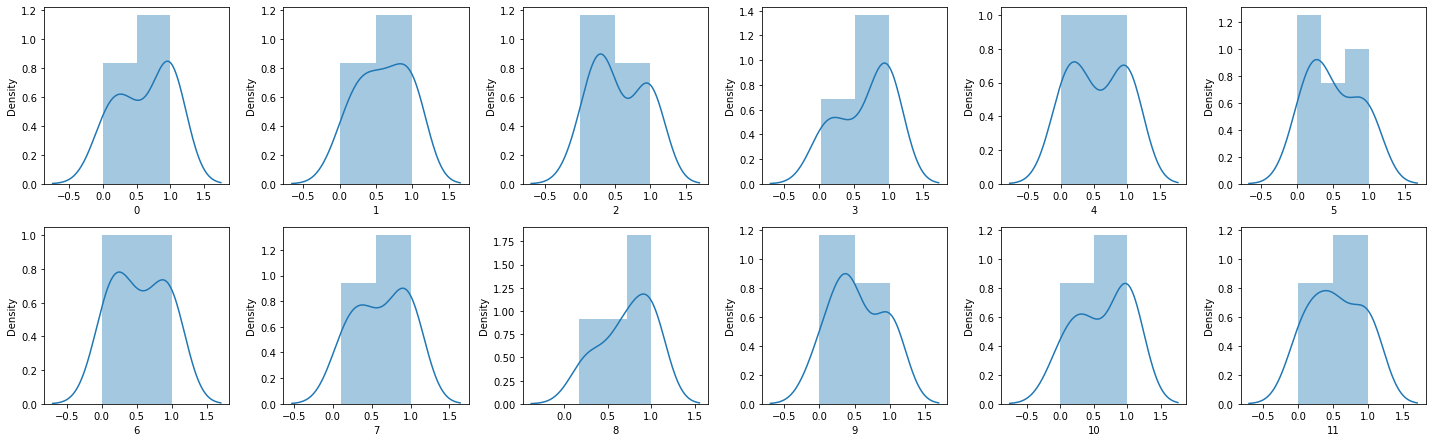

In [9]:
#After preprocessing,now data is in Gaussian Form

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in range(X_new_trans.shape[1]):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(X_new_trans[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Classifiers with dimensionality-reduction and pre-processing

In [10]:
#### Logistic Regression
LR = LogisticRegression()
LR_accuracy=cross_val_score(LR, X_new_trans, y, cv=cv).mean()

#### Decision Tree
decision_tree = DecisionTreeClassifier()
DT_accuracy=cross_val_score(decision_tree, X_new_trans, y, cv=cv).mean()

#### Support Vector Machine
SVM = SVC(probability = True)
SVM_accuracy=cross_val_score(SVM, X_new_trans, y, cv=cv).mean()

#### Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA_accuracy=cross_val_score(LDA, X_new_trans, y, cv=cv).mean()

#### Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
QDA_accuracy=cross_val_score(QDA, X_new_trans, y, cv=cv).mean()

#### Random Forest Classifier
random_forest = RandomForestClassifier()
RF_accuracy=cross_val_score(random_forest, X_new_trans, y, cv=cv).mean()

#### K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_accuracy=cross_val_score(KNN, X_new_trans, y, cv=cv).mean()

#### Naive Bayes
bayes = GaussianNB()
BAYES_accuracy=cross_val_score(bayes, X_new_trans, y, cv=cv).mean()

pd.options.display.float_format = '{:,.2f}%'.format
accuracies2 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy'    : [100*LR_accuracy, 100*DT_accuracy, 100*SVM_accuracy, 100*LDA_accuracy, 100*QDA_accuracy, 100*RF_accuracy, 100*KNN_accuracy, 100*BAYES_accuracy],
    }, columns = ['Model', 'Accuracy'])

accuracies2.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,86.03%
2,Support Vector Machine,84.99%
3,Linear Discriminant Analysis,83.54%
0,Logistic Regression,83.52%
6,K-Nearest Neighbors,83.40%
4,Quadratic Discriminant Analysis,78.51%
1,Decision Tree,78.35%
7,Bayes,77.45%


## Hyperparameter Tuning

In [11]:
### I took top 5 classifier and tried to find the best hyperparameter

#### Random Forest Classifier

best_score=0
n_estimators= [100,200,500,1000]
criterions=['gini', 'entropy']
for i in n_estimators:
    for k in criterions:
        random_forest = RandomForestClassifier(n_estimators=i,criterion=k)
        RF_accuracy=cross_val_score(random_forest, X_new_trans, y, cv=cv).mean()
        if RF_accuracy > best_score:
            best_score=RF_accuracy
            best_est=i
            best_cri=k
RF_accuracy=best_score
print("Best score is:",best_score,"with estimator:",best_est,"criterion:",best_cri)

#### Linear Discriminant Analysis
        
best_score=0        
solver=['svd', 'lsqr', 'eigen']
for i in solver:    
    LDA = LinearDiscriminantAnalysis(solver=i)
    LDA_accuracy=cross_val_score(LDA, X_new_trans, y, cv=cv).mean()
    if LDA_accuracy>best_score:
        best_score=LDA_accuracy
        best_solver=i
LDA_accuracy=best_score
print("Best score is:",best_score,"with solver:",best_solver)


        
#### Logistic Regression

best_score=0     
penalty=['l1', 'l2', 'elasticnet', 'none']
for i in penalty:
    LR = LogisticRegression(penalty=i)
    LR_accuracy=cross_val_score(LR, X_new_trans, y, cv=cv).mean()
    if LR_accuracy > best_score:
        best_score=LR_accuracy
        best_p=i
LR_accuracy=best_score
print("Best score is:",best_score,"with penalty",best_p)



#### K-Nearest Neighbors
        
best_score=0
for i in range(2,10):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN_accuracy=cross_val_score(KNN, X_new_trans, y, cv=cv).mean()
    if KNN_accuracy > best_score:
        best_score=KNN_accuracy
        best_n=i
KNN_accuracy=best_score
print("Best score is:",best_score,"with number of neighbors:",best_n)



#### Support Vector Machine

best_score=0
clist=[0.1,1,2,5]
kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed2']
for i in clist:
    for k in kernel:
        SVM = SVC(C=i,kernel=k)
        SVM_accuracy=cross_val_score(SVM, X_new_trans, y, cv=cv).mean()
        if SVM_accuracy>best_score:
            best_score=SVM_accuracy
            best_c=i
            best_k=k
SVM_accuracy=best_score
print("Best score is:",best_score,"with c:",best_c,"kernel:",k)



        

pd.options.display.float_format = '{:,.2f}%'.format
accuracies3 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors',],
    'Accuracy'    : [100*LR_accuracy, 100*SVM_accuracy, 100*LDA_accuracy, 100*RF_accuracy, 100*KNN_accuracy],
    }, columns = ['Model', 'Accuracy'])

accuracies3.sort_values(by='Accuracy', ascending=False)

Best score is: 0.860438972162741 with estimator: 1000 criterion: entropy
Best score is: 0.835438972162741 with solver: svd
Best score is: 0.8353854389721628 with penalty none
Best score is: 0.8423447537473233 with number of neighbors: 9
Best score is: 0.8565310492505354 with c: 5 kernel: precomputed2


,Model,Accuracy
3,Random Forest,86.04%
1,Support Vector Machine,85.65%
4,K-Nearest Neighbors,84.23%
2,Linear Discriminant Analysis,83.54%
0,Logistic Regression,83.54%


# FINAL RESULTS

In [12]:
print("Classifiers without reduction:")
print(accuracies1.sort_values(by='Accuracy', ascending=False))
print("Classifiers with dimensionality-reduction and pre-processing:")
print(accuracies2.sort_values(by='Accuracy', ascending=False))
print("After optimizing the model and its hyperparameters:")
print(accuracies3.sort_values(by='Accuracy', ascending=False))


Classifiers without reduction:


,Model,Accuracy
5,Random Forest,86.78%
6,K-Nearest Neighbors,84.47%
3,Linear Discriminant Analysis,83.75%
0,Logistic Regression,83.26%
2,Support Vector Machine,82.47%
1,Decision Tree,78.12%
4,Quadratic Discriminant Analysis,69.86%
7,Bayes,69.34%


Classifiers with dimensionality-reduction and pre-processing:


,Model,Accuracy
5,Random Forest,86.03%
2,Support Vector Machine,84.99%
3,Linear Discriminant Analysis,83.54%
0,Logistic Regression,83.52%
6,K-Nearest Neighbors,83.40%
4,Quadratic Discriminant Analysis,78.51%
1,Decision Tree,78.35%
7,Bayes,77.45%


After optimizing the model and its hyperparameters:


,Model,Accuracy
3,Random Forest,86.04%
1,Support Vector Machine,85.65%
4,K-Nearest Neighbors,84.23%
2,Linear Discriminant Analysis,83.54%
0,Logistic Regression,83.54%
